<a href="https://colab.research.google.com/github/bwinna/mini_project_World-why-wealth/blob/main/DADS5001_mid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import re
import sys
import IPython
from IPython.display import display
import seaborn as sns
sns.set()  # Plot using the seaborn style

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NIDA/DADS5001 Tool/mid project/Life-Expectancy-Data-Updated.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NIDA/DADS5001 Tool/mid project/World Happiness Reports 2013-2023/WorldHappinessIndex2013-2023.csv')

In [14]:
list(df.head())

['Country',
 'Region',
 'Year',
 'Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Economy_status_Developed',
 'Economy_status_Developing',
 'Life_expectancy']

In [15]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [16]:
df.isnull().sum()

,0
Country,0
Region,0
Year,0
Infant_deaths,0
Under_five_deaths,0
Adult_mortality,0
Alcohol_consumption,0
Hepatitis_B,0
Measles,0
BMI,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

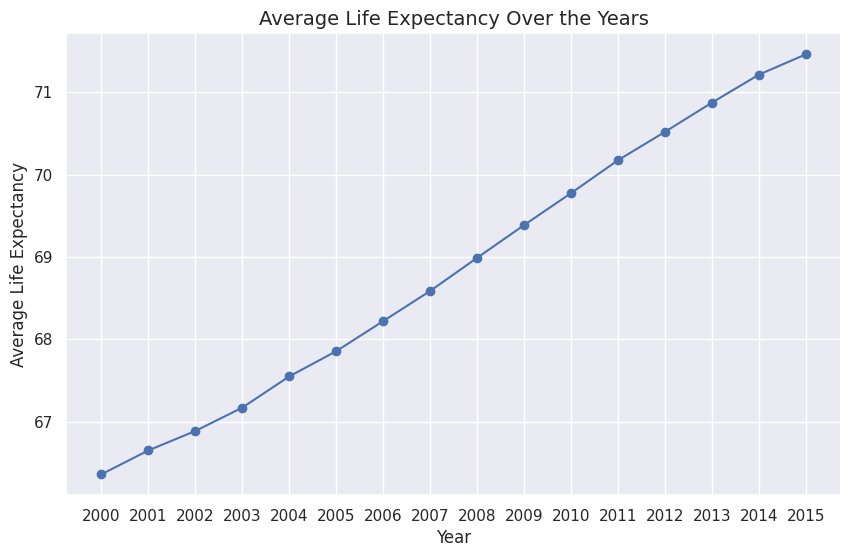

In [18]:

df1=df[['Year','Life_expectancy','Region','Country']]
df1=df.groupby(['Year'])['Life_expectancy'].mean()
# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Average Life Expectancy Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Life Expectancy', fontsize=12)
plt.xticks(np.arange(2000,2016, step=1))

# Show the plot
plt.show()


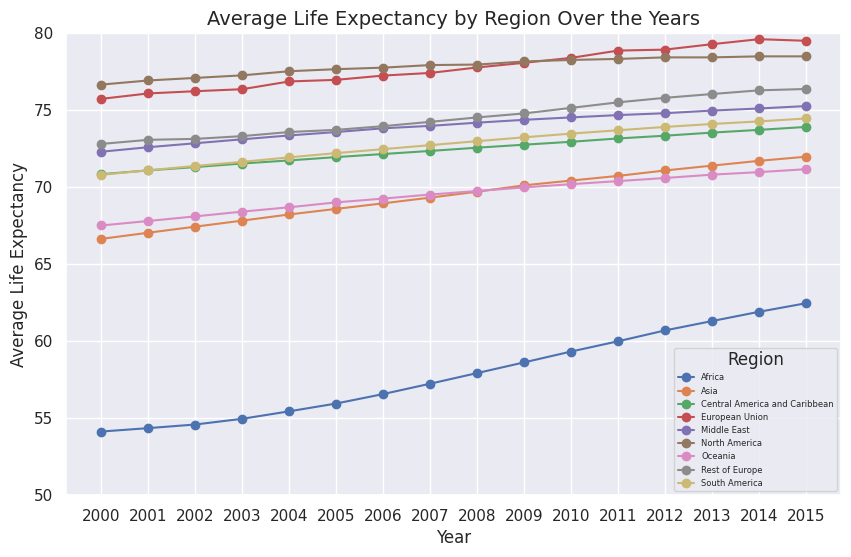

In [19]:
df2=df.groupby(['Year','Region'])['Life_expectancy'].mean()

plt.figure(figsize=(10, 6))

# Unstack the multi-index to get regions as columns
df2_unstacked = df2.unstack(level='Region')

# Plot a line for each region
for region in df2_unstacked.columns:
    plt.plot(df2_unstacked.index, df2_unstacked[region], marker='o', linestyle='-', label=region)

# Add titles and labels
plt.title('Average Life Expectancy by Region Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Life Expectancy', fontsize=12)
plt.ylim(50,80)
# Add a legend to differentiate the regions
plt.legend(title='Region', fontsize = 6, loc='lower right')
plt.xticks(np.arange(2000,2016, step=1))

# Show the plot
plt.grid(True)
plt.show()

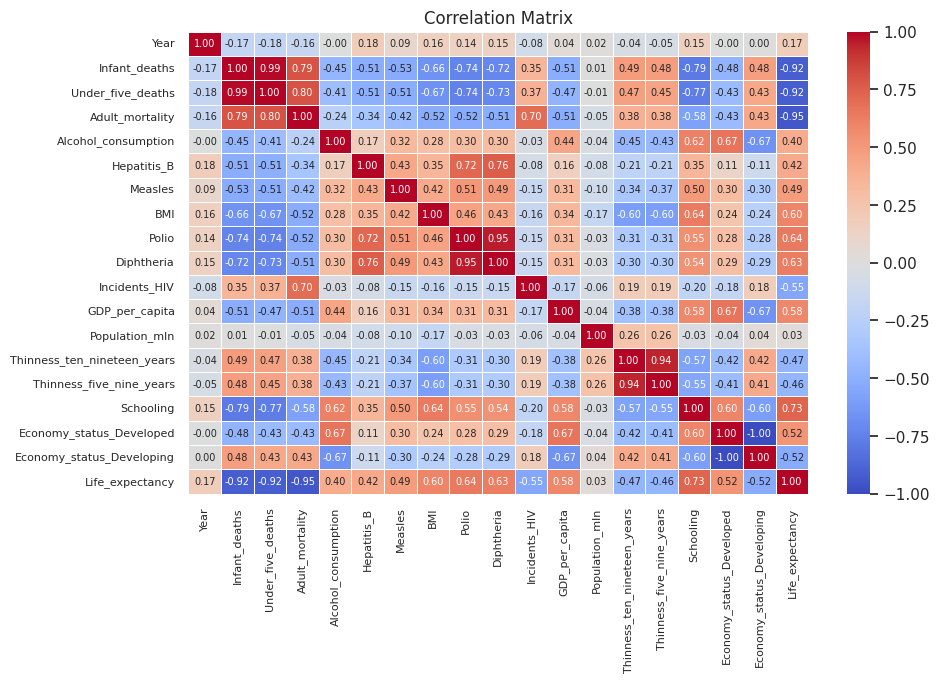

In [24]:
data_numeric = df.drop(['Country', 'Region'], axis=1)

# Creating the correlation matrix
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 7})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation Matrix')
plt.show()